In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import calendar
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import StandardScaler

In [2]:
data_set=pd.read_pickle("fact_bookings.pickle")
property_set=pd.read_pickle("dim_hotels.pickle")
data_set.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
property_set.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Delhi
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [4]:
data_set.columns,property_set.columns

(Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
        'checkout_date', 'no_guests', 'room_category', 'booking_platform',
        'ratings_given', 'booking_status', 'revenue_generated',
        'revenue_realized'],
       dtype='object'),
 Index(['property_id', 'property_name', 'category', 'city'], dtype='object'))

In [5]:
data_set.info(),property_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134590 non-null  int64  
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 12.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dt

(None, None)

In [6]:
data_set.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [7]:
data_set.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [8]:
data_set=pd.merge(data_set,property_set,on='property_id',how='left')

In [9]:
data_set.booking_status.value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

In [10]:
#data_set[data_set.duplicated()].shape
data_set=data_set.drop_duplicates()
data_set.shape

(134590, 15)

In [11]:
data_set["category"]=data_set["category"].map({'Luxury':1,'Business':0})

In [12]:
data_set["booking_status"]=data_set["booking_status"].map({'Checked Out':1,'No Show':1,'Cancelled':0})

In [13]:
data_set["room_category"]=data_set["room_category"].map({'RT1':1,'RT2':2,'RT3':3,'RT4':4})

In [14]:
data_set["city"]=data_set["city"].map({'Delhi':1,'Mumbai':2,'Hyderabad':3,'Bangalore':4})

In [15]:
data_set["booking_platform"]=data_set["booking_platform"].map({'direct online':1,'others':2,'logtrip':3,'tripster':4,'makeyourtrip':5,'journey':6,'direct offline':7})

In [16]:
data_set["property_name"].unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [17]:
data_set["property_name"]=data_set["property_name"].map({'Atliq Grands':1,'Atliq Exotica':2,'Atliq City':3,'Atliq Blu':4,'Atliq Bay':5,'Atliq Palace':6,'Atliq Seasons':7})

In [18]:
data_set=data_set.assign(no_days_book_to_checkin=None,no_days_checkin_checkout=None,rev_person=None,booking_month=None,check_month=None,no_weekend=None)

In [19]:
#Removal Of Unwanted Data
data_set=data_set.drop(columns=['property_id','booking_id','ratings_given','revenue_realized'])

In [20]:
#Finding the number of days from booking_date and check_in_date
def no_of_days_between(from_date,to_date,weekend):
    booking_checkin=[]
    for c in range (len(data_set)):
        holiday=0
        f_date=datetime.datetime.strptime(data_set[from_date][c], '%Y-%m-%d').date()
        t_date=datetime.datetime.strptime(data_set[to_date][c], '%Y-%m-%d').date()
        no_days=t_date-f_date
        booking_checkin.append(no_days.days)
        delta=datetime.timedelta(days=1)
        if weekend==True:
            while (f_date<=t_date):
                f_date+=delta
                if(f_date.weekday()>=5):
                    holiday+=1
            no_week.append(holiday)
    return(booking_checkin)

<h3> Feature Generation </h3>
<h5> New Feature: rev_person is the revenue_generated per no_guests </h6>
<h5> New Feature: no_days_book_to_checkin is the number of the days between booking date and check in date </h6>
<h5> New Feature: no_days_checkin_checkout is the number of the days between check in date and checkout date </h6>
<h5> New Feature: book_month is the month of the booking date </h6>
<h5> New Feature: check_month is the month of check in and checkout date </h6>

In [21]:
no_week=[]
data_set["rev_person"]=data_set["revenue_generated"]/data_set["no_guests"]
data_set["no_days_book_to_checkin"]=no_of_days_between('booking_date','check_in_date',weekend=False)
data_set["no_days_checkin_checkout"]=no_of_days_between('check_in_date','checkout_date',weekend=True)
data_set["no_weekend"]=no_week
data_set["booking_month"]=data_set['booking_date'].apply(lambda x:x.split("-")[1])
data_set["check_month"]=(data_set['check_in_date'].apply(lambda x:x.split("-")[1]).astype(int)+data_set['checkout_date'].apply(lambda x:x.split("-")[1]).astype(int))/2

In [22]:
#Removal of Data which is done after feature generation
data_set=data_set.drop(columns=['booking_date','check_in_date','checkout_date'],axis=0)

In [23]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   no_guests                 134590 non-null  int64  
 1   room_category             134590 non-null  int64  
 2   booking_platform          134590 non-null  int64  
 3   booking_status            134590 non-null  int64  
 4   revenue_generated         134590 non-null  int64  
 5   property_name             134590 non-null  int64  
 6   category                  134590 non-null  int64  
 7   city                      134590 non-null  int64  
 8   no_days_book_to_checkin   134590 non-null  int64  
 9   no_days_checkin_checkout  134590 non-null  int64  
 10  rev_person                134590 non-null  float64
 11  booking_month             134590 non-null  object 
 12  check_month               134590 non-null  float64
 13  no_weekend                134590 non-null  i

In [24]:
data_set[["booking_status","room_category","booking_platform","booking_month"]]=data_set[["booking_status","room_category","booking_platform","booking_month"]].astype(int).astype(int).astype(int).astype(int)

In [25]:
data_set=data_set.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13,3]]

In [26]:
data_set.head()

,no_guests,room_category,booking_platform,revenue_generated,property_name,category,city,no_days_book_to_checkin,no_days_checkin_checkout,rev_person,booking_month,check_month,no_weekend,booking_status
0,3,1,1,10010,1,1,1,4,1,3336.666667,4,5.0,0,1
1,2,1,2,9100,1,1,1,1,1,4550.000000,4,5.0,0,0
2,2,1,3,9100,1,1,1,3,3,4550.000000,4,5.0,0,1
3,2,1,2,9100,1,1,1,3,1,4550.000000,4,5.0,0,0
4,4,1,1,10920,1,1,1,4,1,2730.000000,4,5.0,0,1


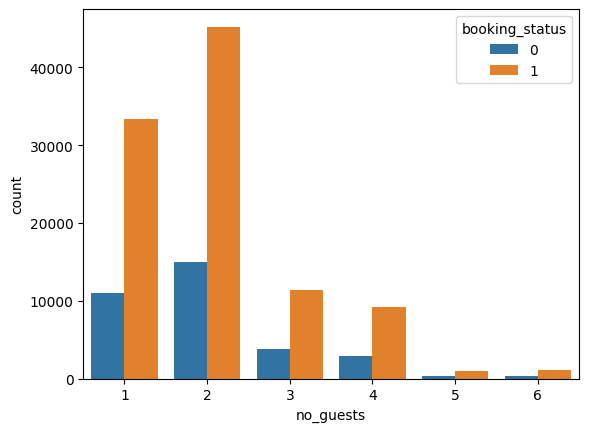

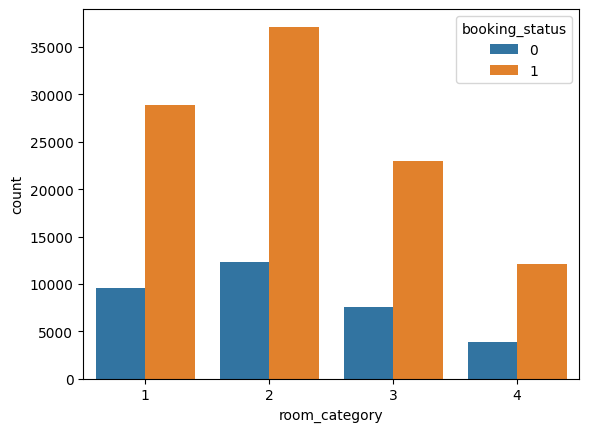

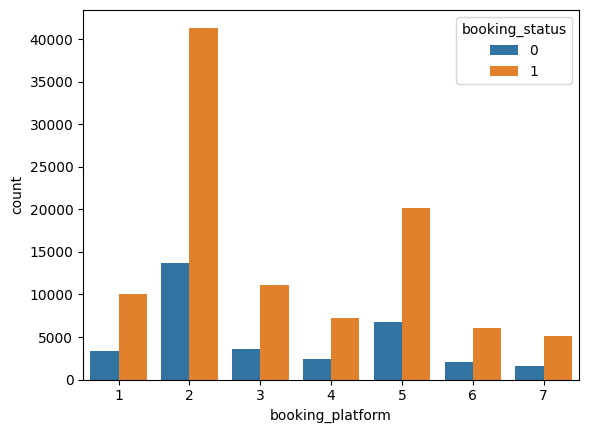

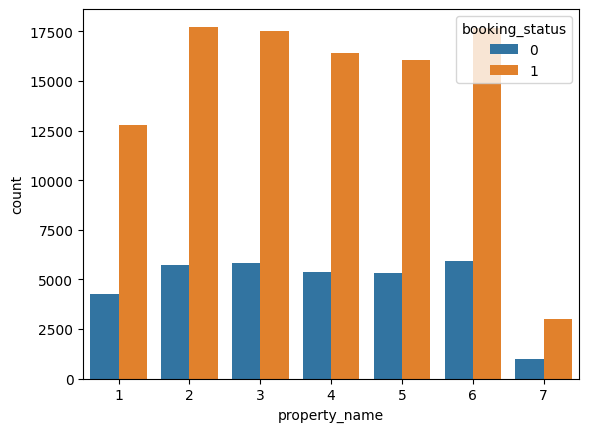

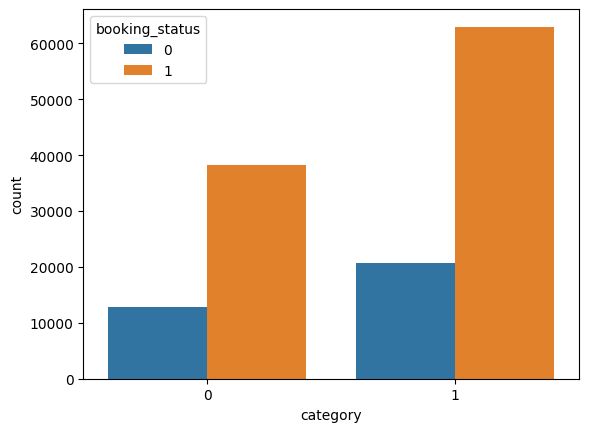

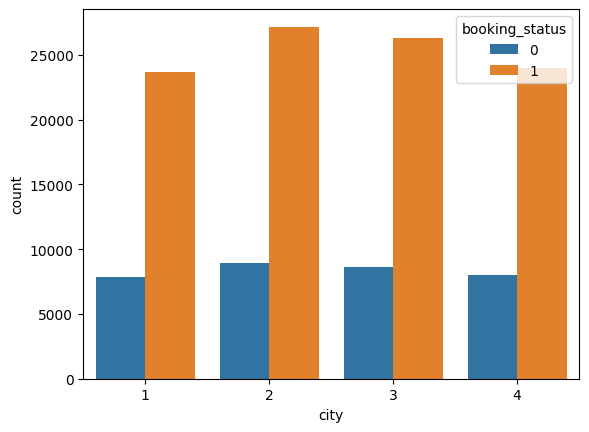

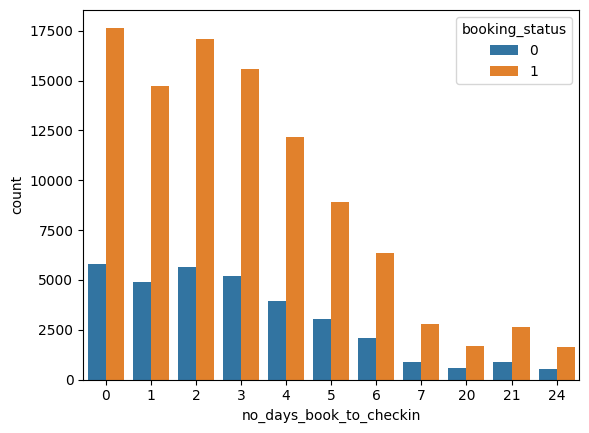

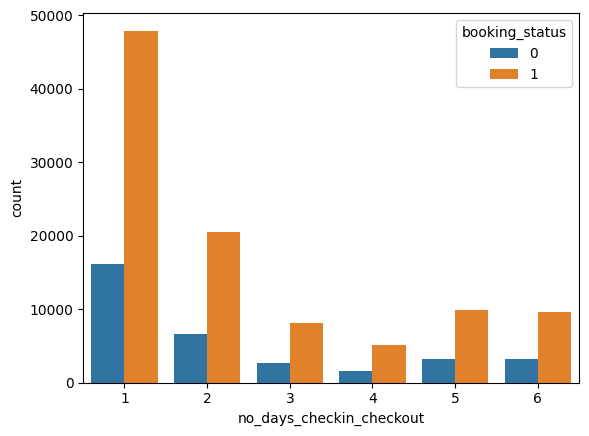

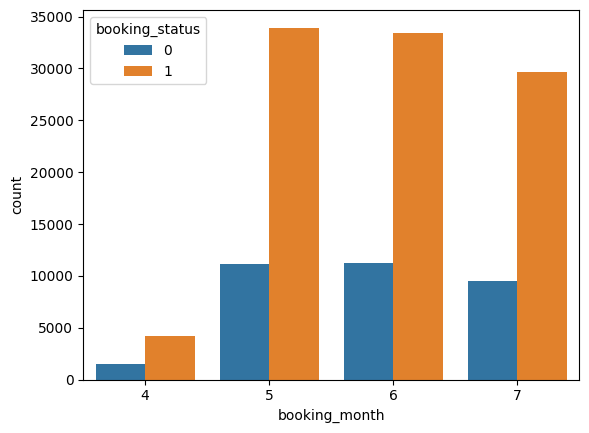

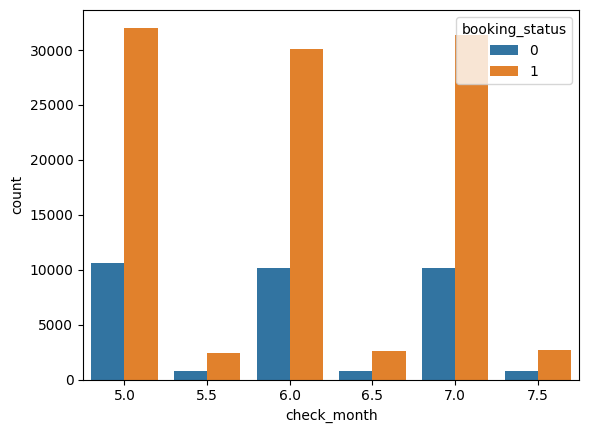

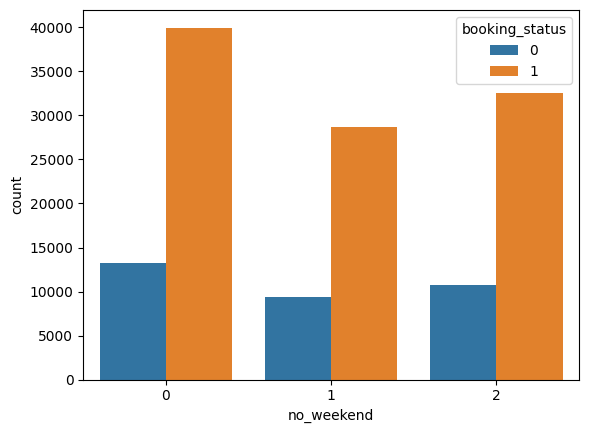

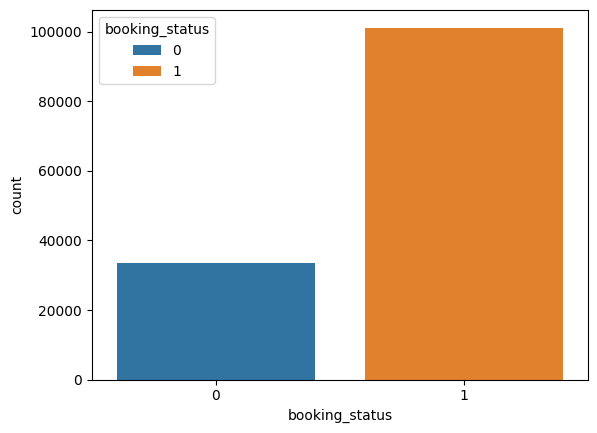

In [27]:
for column in data_set.columns:
    if (column!='revenue_generated' and column!='rev_person'):
        sns.countplot(data_set,x=column,hue='booking_status')
        plt.show() 

<h3> Behaviour of booking_status based on input variables </h3>
<h5> Out of 134590 reservation, 101170 got Checked Out or No Show and  3342 got Cancelled) </h5>
<h5> Most reservation are booked for two guests and the room category (RT2) </h5>
<h5> Most of the reservation are reserved through other means </h5>
<h5> Luxury type hotels are reserved more than the Business ones </h5>
<h5> Most people reserve their rooms for one day and book them within three days before the check-in date </h5>

<h1> Outlier Detection and Removal</h1>

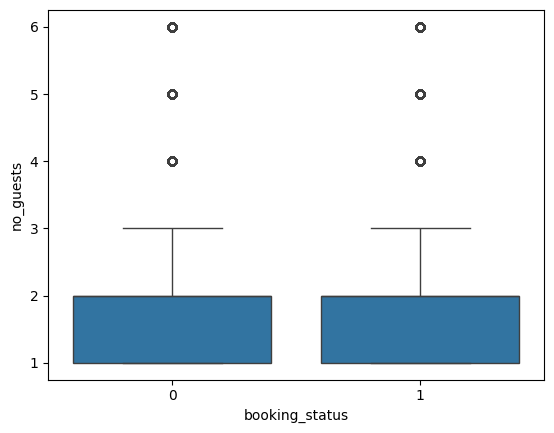

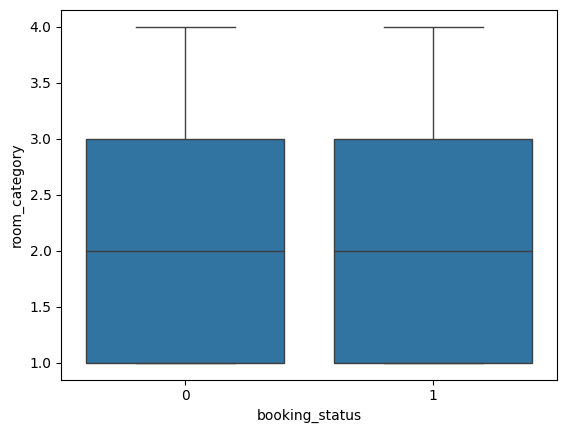

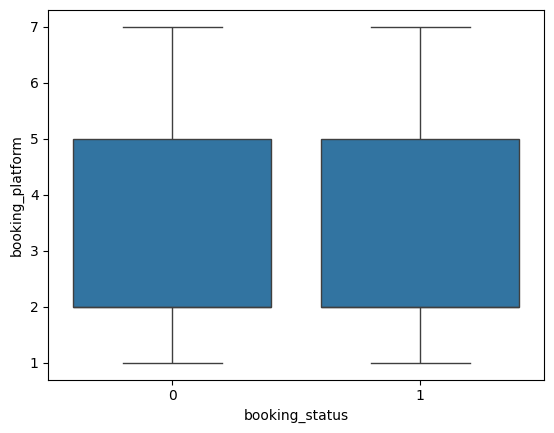

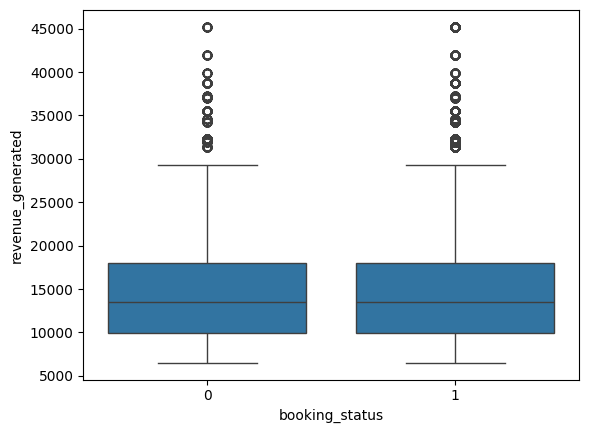

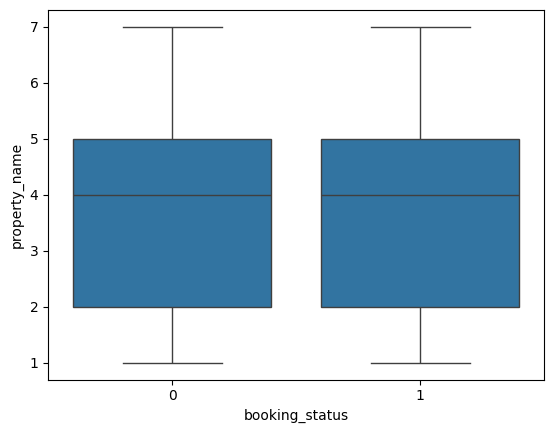

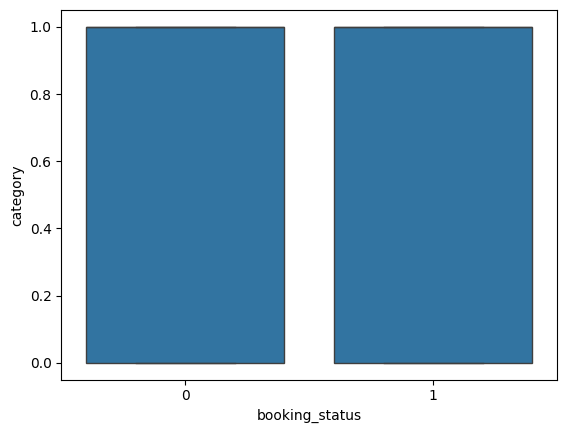

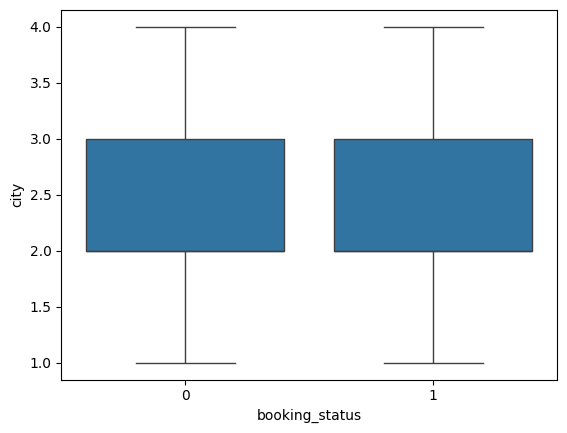

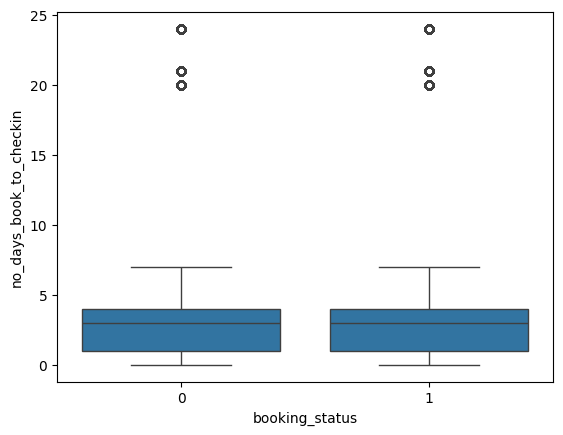

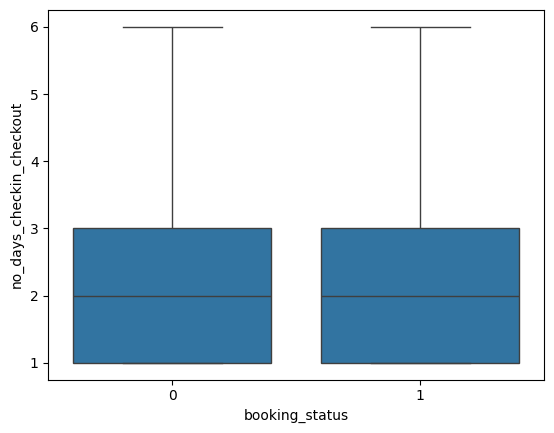

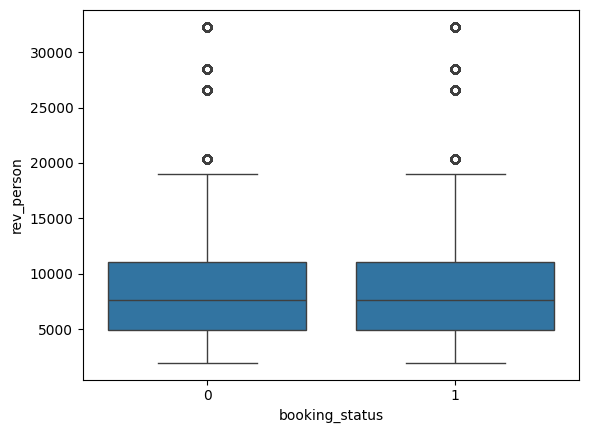

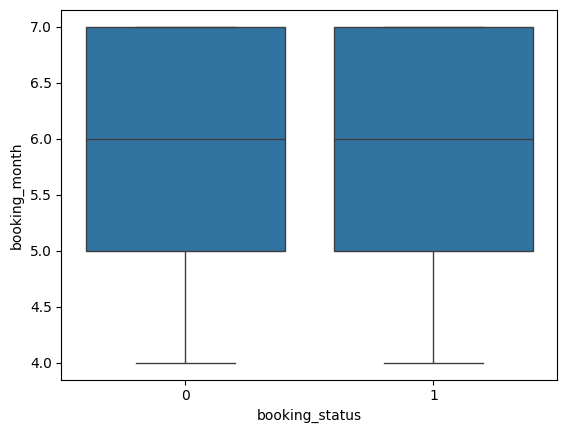

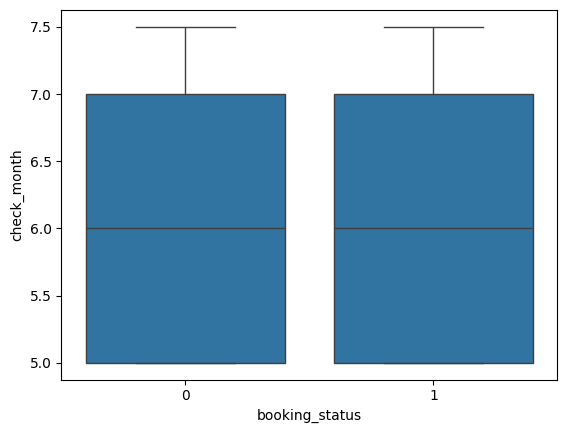

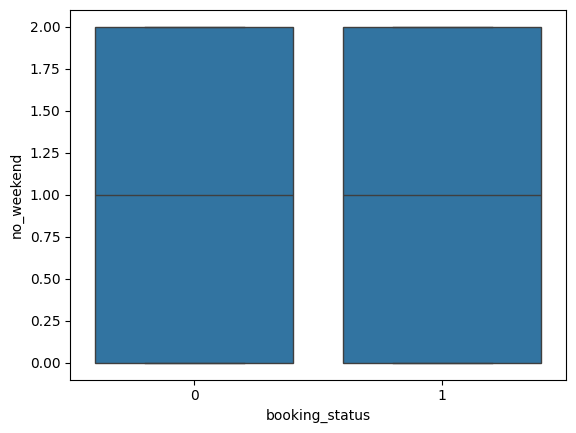

In [28]:
for column in data_set.columns:
    if (column!='booking_status'):
        sns.boxplot(y=column,x='booking_status',data=data_set)
        plt.show() 

In [29]:
def iqr_method(outlier):
    #Removing Outliers using IQR Method
    q1=data_set[outlier].quantile(0.25)
    q3=data_set[outlier].quantile(0.75)
    iqr=q3-q1
    upper_limit = q3 + (1.5*iqr)
    lower_limit = q1 - (1.5*iqr)
    #capping
    data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit
    data_set.loc[(data_set[outlier]<lower_limit),outlier]=lower_limit

C:\Users\donku\AppData\Local\Temp\ipykernel_13292\1941874273.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit
C:\Users\donku\AppData\Local\Temp\ipykernel_13292\1941874273.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '8.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_set.loc[(data_set[outlier]>upper_limit),outlier]=upper_limit


<Axes: xlabel='booking_status', ylabel='rev_person'>

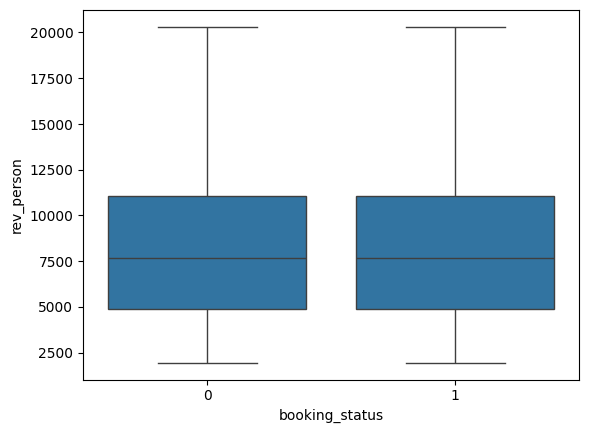

In [30]:
iqr_method('rev_person')
iqr_method('revenue_generated')
iqr_method('no_guests')
iqr_method('no_days_book_to_checkin')
sns.boxplot(y='rev_person',x='booking_status',data=data_set)

<Axes: xlabel='booking_status', ylabel='revenue_generated'>

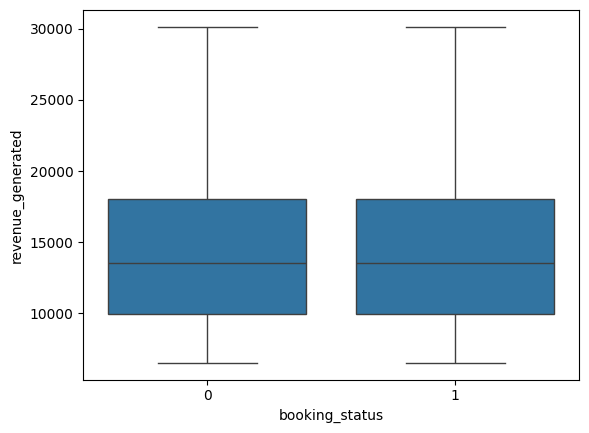

In [31]:
sns.boxplot(y='revenue_generated',x='booking_status',data=data_set)

<h1>Feature Selection</h1>

In [32]:
#Feature Selection - Dropping constant features (Constant Features which aren't relevant to the output is removed)
data_set_X=data_set.drop(columns='booking_status')
data_set_Y=data_set['booking_status']
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0)
var_thres.fit(data_set)

VarianceThreshold(threshold=0)

In [33]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

<Axes: >

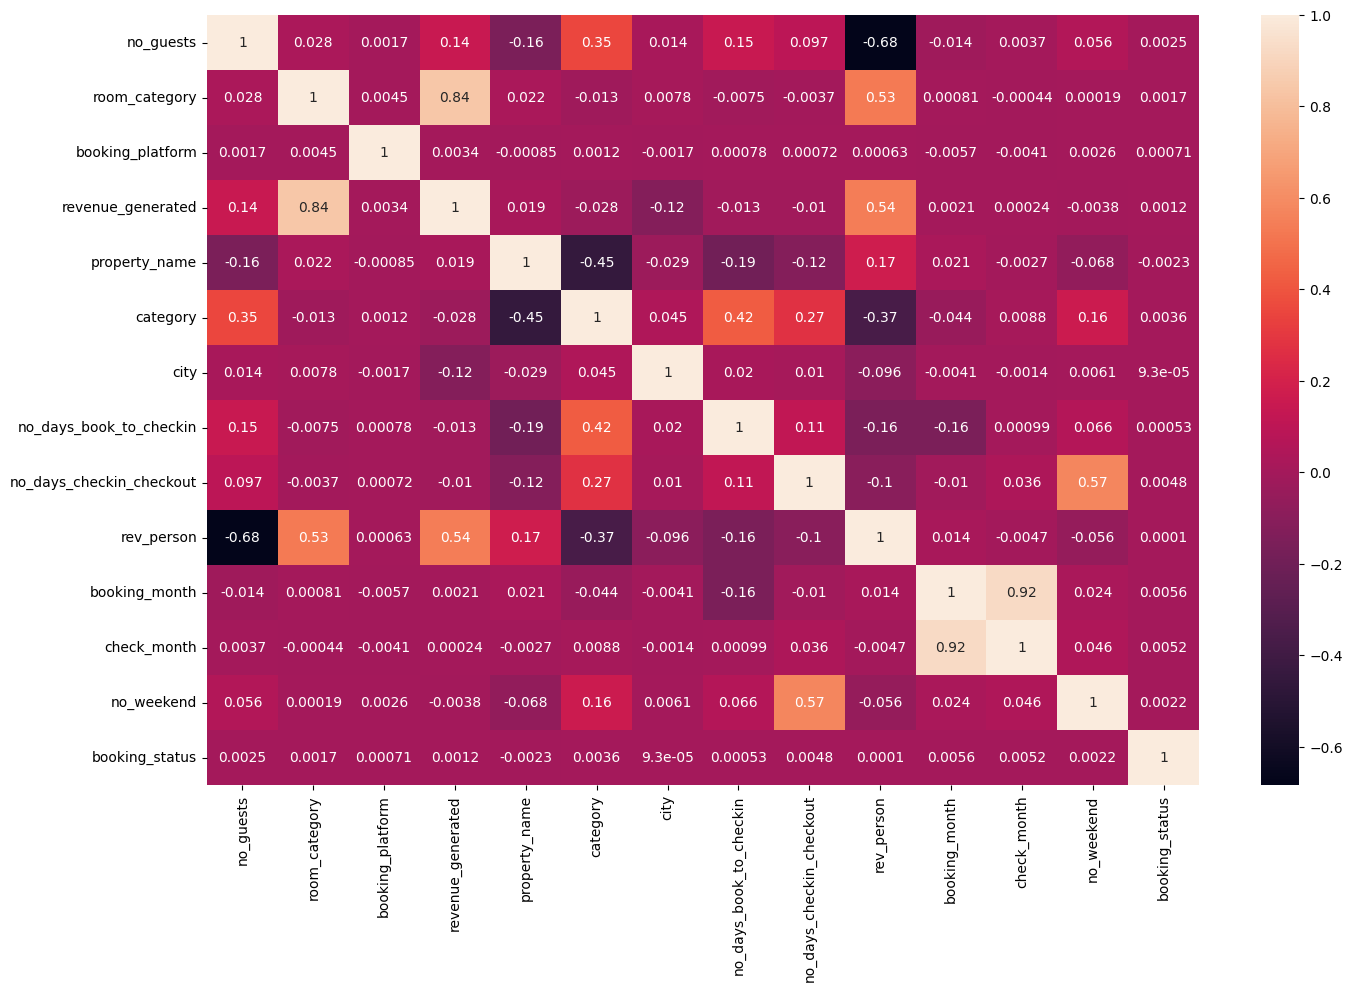

In [34]:
corelation = data_set.corr()
plt.figure(figsize=(16,10))
sns.heatmap(corelation, xticklabels=corelation.columns, yticklabels=corelation.columns,annot=True)

In [35]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [36]:
corr_features=correlation(data_set,0.7)
data_set_X=data_set_X.drop(corr_features,axis=1)
corr_features

{'check_month', 'revenue_generated'}